# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [1]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [2]:
# importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

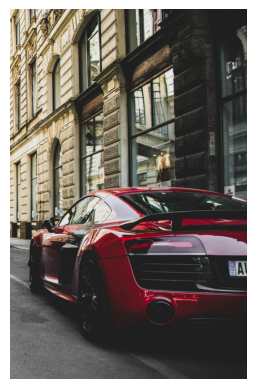

In [3]:
image = cv2.imread("/content/pexels-mayday-1545743.jpg")
# we have to convert this image to RGB-space because cv2 reads in BGR but matplot displays expecting it to be in RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plotting the image
plt.imshow(image)
plt.axis('off')
plt.show()

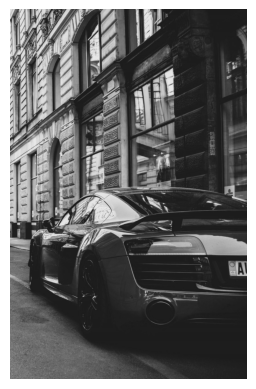

In [4]:
# computing and plotting graying scale image using weighted sum formula
r = image[:,:,0]
b = image[:,:,1]
g = image[:,:,2]

weighted_gray = 0.299 * r + 0.587 * g + 0.114 * b
plt.imshow(weighted_gray, cmap='gray')
plt.axis("off")
plt.show()


Text(0.5, 1.0, 'weighted_gray')

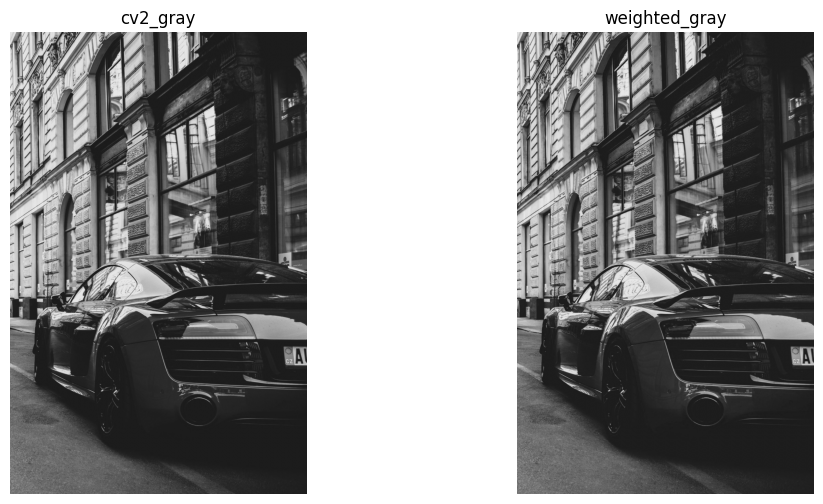

In [5]:
cv2_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # gray scale image using cv2 function

# plotting the two gray images side side
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(cv2_gray, cmap='gray')
plt.axis("off")
plt.title("cv2_gray")

plt.subplot(1,2,2)
plt.imshow(weighted_gray, cmap='gray')
plt.axis("off")
plt.title("weighted_gray")

Both the images looks almost same. Lets see if they have same pixel values

In [6]:
print(cv2_gray)
print(weighted_gray)

[[224 225 226 ...  31  31  31]
 [224 225 226 ...  31  31  31]
 [225 226 227 ...  31  31  31]
 ...
 [132 139 144 ...  33  33  33]
 [136 148 154 ...  33  33  33]
 [132 148 156 ...  33  33  33]]
[[217.576 218.576 220.739 ...  31.     31.     31.   ]
 [217.576 218.576 220.739 ...  31.     31.     31.   ]
 [218.092 219.092 221.739 ...  31.     31.     31.   ]
 ...
 [132.    139.    144.    ...  33.     33.     33.   ]
 [136.    148.    154.    ...  33.     33.     33.   ]
 [132.    148.    156.    ...  33.     33.     33.   ]]


Very small difference. Lets plot their difference image

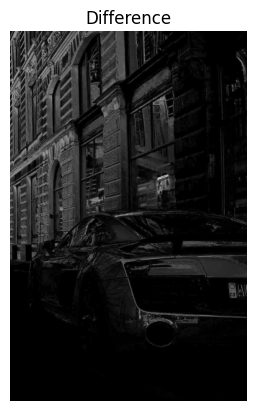

In [7]:
diff = abs(cv2_gray-weighted_gray)

plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.title("Difference")
plt.show()

Looks Dark due to low pixel values.

In [8]:
print(diff)

[[6.42400000e+00 6.42400000e+00 5.26100000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.42400000e+00 6.42400000e+00 5.26100000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.90800000e+00 6.90800000e+00 5.26100000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.84217094e-14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


Only few pixels have any value and even these value are very less.

In [9]:
print(image.shape)
print(cv2_gray.shape)

(3327, 2133, 3)
(3327, 2133)


The RGB image is 3-channeled so it requires 3-D array to represent while the gray only has one channel so its easily represented in a 2-D array.

In [10]:
print(image)
print(cv2_gray)

[[[230 224 210]
  [231 225 211]
  [230 226 215]
  ...
  [ 31  31  31]
  [ 31  31  31]
  [ 31  31  31]]

 [[230 224 210]
  [231 225 211]
  [230 226 215]
  ...
  [ 31  31  31]
  [ 31  31  31]
  [ 31  31  31]]

 [[229 226 211]
  [230 227 212]
  [231 227 216]
  ...
  [ 31  31  31]
  [ 31  31  31]
  [ 31  31  31]]

 ...

 [[132 132 132]
  [139 139 139]
  [144 144 144]
  ...
  [ 33  33  33]
  [ 33  33  33]
  [ 33  33  33]]

 [[136 136 136]
  [148 148 148]
  [154 154 154]
  ...
  [ 33  33  33]
  [ 33  33  33]
  [ 33  33  33]]

 [[132 132 132]
  [148 148 148]
  [156 156 156]
  ...
  [ 33  33  33]
  [ 33  33  33]
  [ 33  33  33]]]
[[224 225 226 ...  31  31  31]
 [224 225 226 ...  31  31  31]
 [225 226 227 ...  31  31  31]
 ...
 [132 139 144 ...  33  33  33]
 [136 148 154 ...  33  33  33]
 [132 148 156 ...  33  33  33]]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [11]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

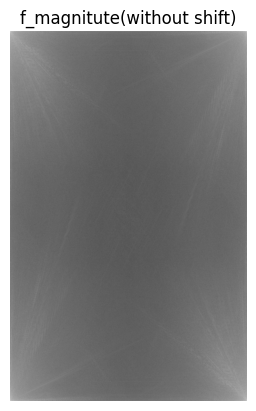

In [12]:
# first converting the image to float for accurate mathematical computation
float_gray = cv2_gray.astype(np.float32)

# calculating Fast fourier transform
f = np.fft.fft2(float_gray)

# plotting the magnitude(log-scaled) without shifting. Lets just see
f_mag = 20*np.log(np.abs(f)+1)
plt.imshow(f_mag, cmap='gray')
plt.axis('off')
plt.title("f_magnitute(without shift)")
plt.show()

we see the two things:


1.   Low frequency at the corner. WHY?
      
      The 2D DFT assumes the data is periodic, and index (0,0) is the origin of frequency space.

      In NumPy’s FFT output:
      *   Row index 0 corresponds to frequency 0 vertically.
      *   Column index 0 corresponds to frequency 0 horizontally.
      
      So the lowest frequencies end up in the top-left corner, and the other corners contain other low-frequency combinations.


2.   Why are they bright?
      
      Most natural images have stronger low-frequency components

      Natural images (photos, scenes, objects) usually contain:

     * Smooth regions


      * Gradual intensity changes

      * Low-detail areas




      These structures correspond to low frequencies in the Fourier domain.



In [13]:
# Now shifting corners to center in the original FFT

fshift = np.fft.fftshift(f)

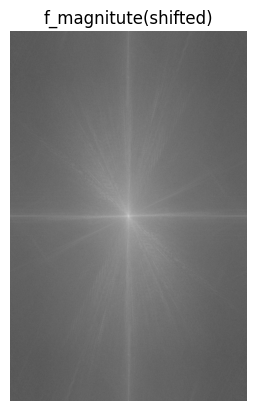

In [14]:
fshift_mag = 20*np.log(np.abs(fshift)+1)

fshift_phase = np.angle(fshift)

# plotting the magnitude(log-scaled) with shifting
plt.imshow(fshift_mag, cmap='gray')
plt.axis('off')
plt.title("f_magnitute(shifted)")
plt.show()




In [15]:
print(fshift_mag)
print(cv2_gray.shape)

[[132.42537 150.10774 159.5131  ... 155.7033  160.44334 151.75208]
 [136.21498 141.00244 141.70074 ... 152.09293 155.18922 164.884  ]
 [167.67189 160.83345 157.87059 ... 122.3179  160.3876  164.38504]
 ...
 [164.38504 160.3876  122.3179  ... 157.87059 160.83345 167.67189]
 [164.884   155.18922 152.09293 ... 141.70074 141.00244 136.21498]
 [151.75208 160.44334 155.7033  ... 159.5131  150.10774 132.42537]]
(3327, 2133)


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [16]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [17]:
# LPF
radius = [10, 30, 80]
LPF = []
for r in radius:
  #creating mask
  mask = np.zeros_like(cv2_gray)
  cx = mask.shape[0]//2
  cy = mask.shape[1]//2
  cv2.circle(mask, (cy, cx), r, 1, -1)
  LPF.append(mask)

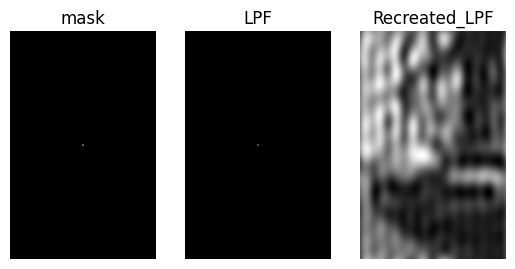

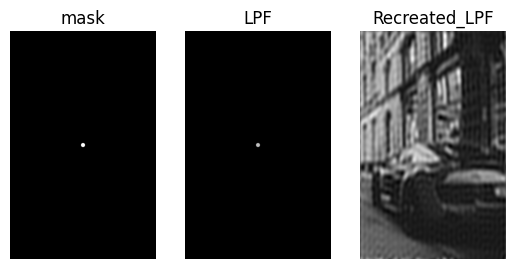

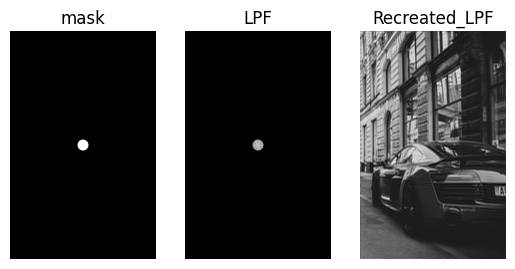

In [18]:
# reconstructing using LPF
for lpf in LPF:
  f_lpf = fshift*lpf

  ishift_f_lpf = np.fft.ifftshift(f_lpf)
  inv_img_lpf = np.fft.ifft2(ishift_f_lpf)

  inv_lpf = np.abs(inv_img_lpf)

  # plotting
  plt.subplot(1,3,1)
  plt.imshow(lpf, cmap='gray')
  plt.title("mask")
  plt.axis("off")

  plt.subplot(1,3,2)
  plt.imshow(20*np.log(np.abs(f_lpf)+1), cmap='gray')
  plt.title("LPF")
  plt.axis("off")

  plt.subplot(1,3,3)
  plt.imshow(inv_lpf, cmap='gray')
  plt.title("Recreated_LPF")
  plt.axis("off")

  plt.show()



As the radius of LPF decreases, the recreated image becames more and more blur. This is due to the fact that the low frequency component defines the smooth/slow changing areas in the image while the higher frequency defines edges/fine details in the image. As radius decreases,  the LPF output contains  even more lower frequency so the recreated image becomes even more blurred.

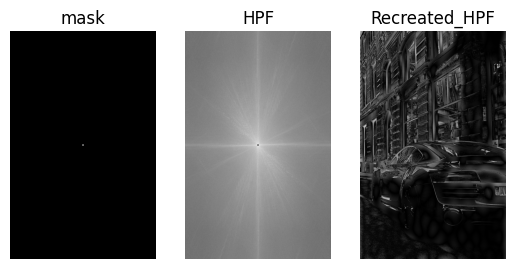

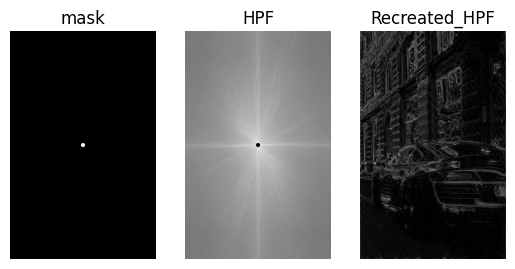

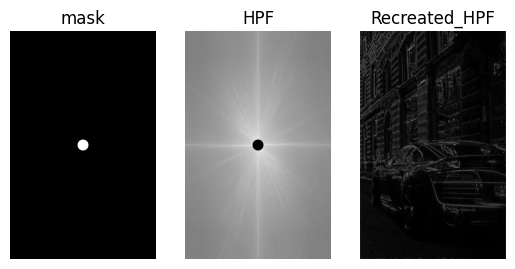

In [19]:
# reconstructing using LPF
for lpf in LPF:
  hpf = 1 - lpf
  f_hpf = fshift*hpf

  ishift_f_hpf = np.fft.ifftshift(f_hpf)
  inv_img_hpf = np.fft.ifft2(ishift_f_hpf)

  inv_hpf = np.abs(inv_img_hpf)

  # plotting
  plt.subplot(1,3,1)
  plt.imshow(lpf, cmap='gray')
  plt.title("mask")
  plt.axis("off")

  plt.subplot(1,3,2)
  plt.imshow(20*np.log(np.abs(f_hpf)+1), cmap='gray')
  plt.title("HPF")
  plt.axis("off")

  plt.subplot(1,3,3)
  plt.imshow(inv_hpf, cmap='gray')
  plt.title("Recreated_HPF")
  plt.axis("off")

  plt.show()



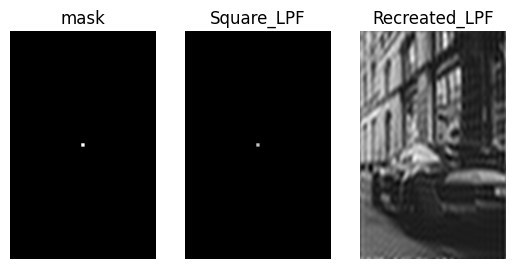

In [20]:
# creating square LPF
sq_lpf = np.zeros_like(cv2_gray)

sq_lpf[cx-25:cx+24,cy-25:cy+24] = 1


f_lpf = fshift*sq_lpf

ishift_f_lpf = np.fft.ifftshift(f_lpf)
inv_img_lpf = np.fft.ifft2(ishift_f_lpf)

inv_lpf = np.abs(inv_img_lpf)

# plotting
plt.subplot(1,3,1)
plt.imshow(sq_lpf, cmap='gray')
plt.title("mask")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(20*np.log(np.abs(f_lpf)+1), cmap='gray')
plt.title("Square_LPF")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(inv_lpf, cmap='gray')
plt.title("Recreated_LPF")
plt.axis("off")

plt.show()







## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [21]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

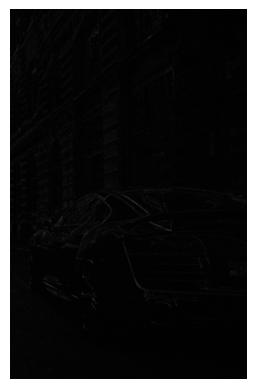

In [22]:
# Phase-only reconstruction
phase_only = fshift / np.abs(fshift)
phase_only_shift = np.fft.ifftshift(phase_only)
phase_only_inv = np.fft.ifft2(phase_only_shift)

phase_only_inv = np.abs(phase_only_inv)



plt.imshow(phase_only_inv, cmap='gray')
plt.axis("off")
plt.show()

np.angle(f_shift) gives back angle values which are real numbers while the one used above only normalises the magnitude of frequency domain so that it only contains its phase in compplex exponential form i.e. exp(i*theta)


Reconstructing from np.angle(f_shift) would first require to convert the angle into exponential form.

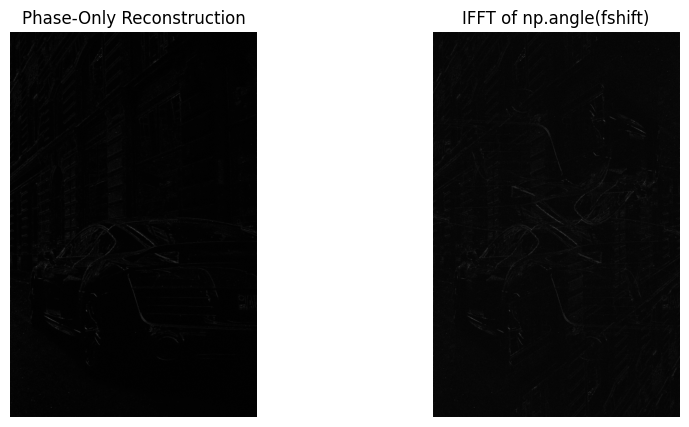

In [23]:
# direct reconstruction would create different image.
theta = np.angle(fshift)
direct_reconstruction = np.fft.ifft2(np.fft.ifftshift(theta))
direct_reconstruction = np.abs(direct_reconstruction)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Phase-Only Reconstruction")
plt.imshow(phase_only_inv, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("IFFT of np.angle(fshift)")
plt.imshow(direct_reconstruction, cmap='gray')
plt.axis('off')

plt.show()

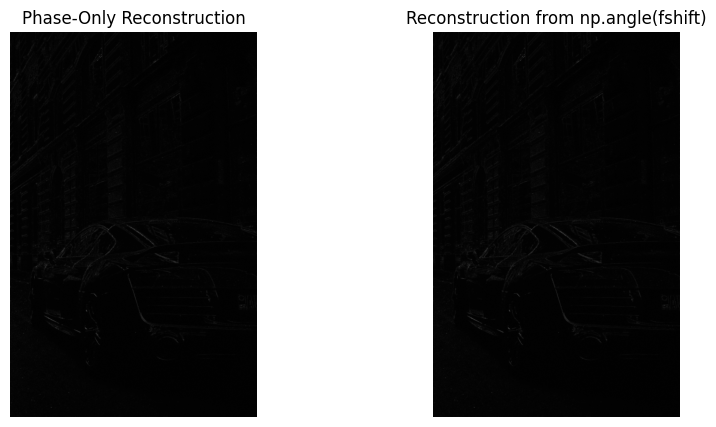

In [24]:
# we will try reconstructing it by first converting it to complex exponential
phase_angle = np.angle(fshift)

phase_in_exp = np.exp(1j * phase_angle)
phase_in_exp_ishift = np.fft.ifftshift(phase_in_exp)
reconstruction = np.fft.ifft2(phase_in_exp_ishift)
reconstruction = np.abs(reconstruction)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Phase-Only Reconstruction")
plt.imshow(phase_only_inv, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Reconstruction from np.angle(fshift)")
plt.imshow(reconstruction, cmap='gray')
plt.axis('off')

plt.show()

Direct reconstruction from np.angle(fshift) does not give true phase-only reconstruction but it still cover image structure.

while reconstruction after converting it to complex exponential give the true phase-only reconastruction.

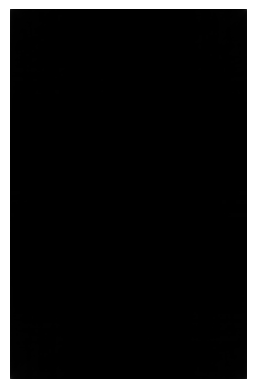

In [25]:
# D2
magnitude_only = np.abs(fshift)

magnitude_only_shift = np.fft.ifftshift(magnitude_only)
magnitude_only_img = np.fft.ifft2(magnitude_only_shift)

plt.imshow(abs(magnitude_only_img), cmap='gray')
plt.axis("off")
plt.show()


 The magnitude spectrum we normally display uses logarithmic scaling:
     log_mag = np.log(1 + abs(F_shift))
 This is only for visualization because the raw magnitude values
 vary over a huge range. Logarithm compresses the dynamic range
 so we can see the smaller frequency components.

 In reconstruction, we use the TRUE magnitude (abs(F_shift)) without log.
 Since this magnitude contains no phase, the IFFT produces a blurry,
 symmetric image with no real structure. That's why the reconstruction
 looks completely different from the log-magnitude spectrum display.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

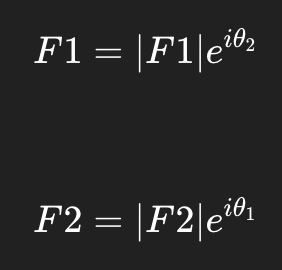

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [26]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [27]:
# we have 1st image as earlier :
image1 = image.copy()
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
H, W = gray1.shape

#2nd image
image2 = cv2.imread("/content/pexels-abhinav-8532378.jpg")
image2 = cv2.resize(image2, (W, H))
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


In [28]:
#  FFT of image 1
F1 = np.fft.fft2(gray1)
F1_shift = np.fft.fftshift(F1)
mag1 = np.abs(F1_shift)
phase1 = np.angle(F1_shift)

#  FFT of image 2
F2 = np.fft.fft2(gray2)
F2_shift = np.fft.fftshift(F2)
mag2 = np.abs(F2_shift)
phase2 = np.angle(F2_shift)

In [29]:
#  Swap magnitude and phase

# magnitude of image1 + phase of image2
swap12 = mag1 * np.exp(1j * phase2)

# magnitude of image2 + phase of image1
swap21 = mag2 * np.exp(1j * phase1)

In [30]:
#  Reconstructing both swapped images
rec12 = np.abs(np.fft.ifft2(np.fft.ifftshift(swap12)))
rec21 = np.abs(np.fft.ifft2(np.fft.ifftshift(swap21)))

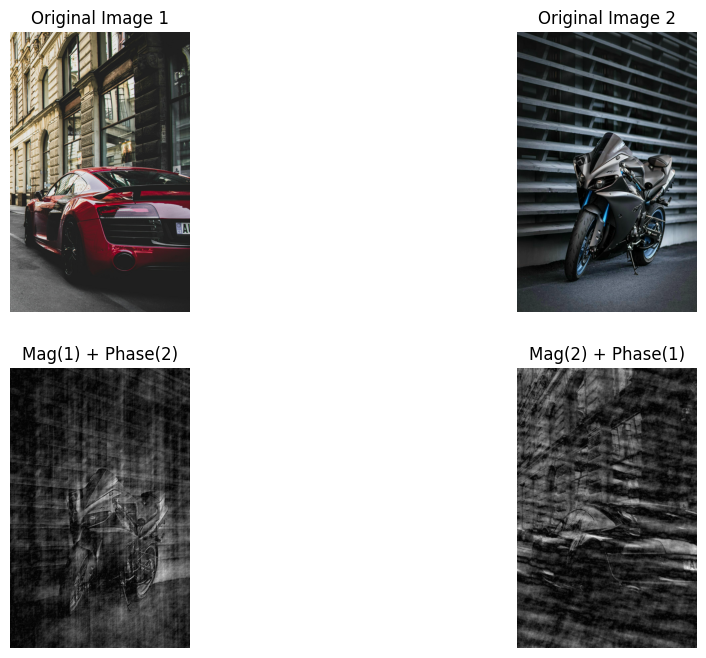

In [31]:
#  Display results
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title("Original Image 1")
plt.imshow(image1)
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Original Image 2")
plt.imshow(image2)
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Mag(1) + Phase(2)")
plt.imshow(rec12, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Mag(2) + Phase(1)")
plt.imshow(rec21, cmap='gray')
plt.axis('off')

plt.show()


 After swapping magnitude and phase, we observe that the reconstructed images take on the structure (shapes, edges, outlines) of the image
 whose phase is used, while the overall texture and contrast come from
 the image whose magnitude is used.

 This clearly demonstrates:
     → Phase controls the structural information (geometry, edges).
     → Magnitude controls the texture / intensity distribution.

 Even with a completely different magnitude, the phase determines
what the image "looks like".